In [1]:
import sys
sys.path.append('D:/v1ktop/Drive-INAOE/Code/data_aumentation_for_author_profiling/')

In [2]:
from word_level_da.preprocessing.load_data import Dataset

In [3]:
 %load_ext autoreload

In [4]:
 %autoreload 2

In [5]:
key="depresion18_local"

In [6]:
data_cls=Dataset(key=key, remove_end=True, chunking=True, doc_len=64, min_len=32)

## Explore data

In [9]:
from word_level_da.classifier.explore_data import explore_data
from word_level_da.classifier.feature_extraction import FeatureExtraction
from word_level_da.classifier.svm_text import Svm_Text

In [11]:
all_training= data_cls.get_dataset(folder_name="prep_chunks_joined", truth_name="golden_truth.txt",
                              partition="training")

In [12]:
exp_cls=explore_data(all_training[0], all_training[1], "D:/", plot_format="png")

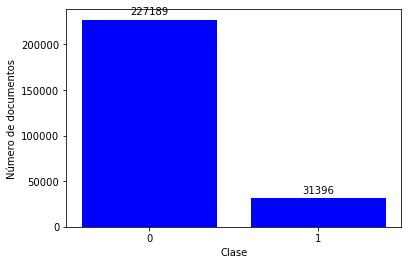

In [13]:
exp_cls.plot_class_distribution()

## Palabras dependientes de la clase incluyendo palabras de paro con p<0.001

In [16]:
ft=FeatureExtraction(all_training[0], w_range=(1,1), stop_wors=None, use_idf=True)

In [17]:
top_words_with_stop=ft.get_chi_2(all_training[1], p=0.001)

In [18]:
print("Numero de palabras")
len(top_words_with_stop)

Numero de palabras


1080

In [27]:
top_words_with_stop[0:100]

,score,pval
depressive,85.449032,0.0
friend,90.780391,0.0
friends,156.382169,0.0
istick,55.680715,0.0
situation,35.856450,0.0
...,...,...
atomizer,38.160179,0.0
so,130.279454,0.0
sunscreen,46.856669,0.0
doctor,54.765790,0.0


In [32]:
top_words_with_stop[-100:-1]

,score,pval
dagon,11.716806,0.000619
traumatic,11.707606,0.000622
unhappy,11.701719,0.000624
workers,11.701701,0.000624
jeannie,11.698638,0.000625
...,...,...
turquoise,10.882608,0.000971
pudge,10.861150,0.000982
un,10.860860,0.000982
story,10.859443,0.000983


In [33]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
#! pip install multidict

In [35]:
import multidict as multidict

In [66]:
def getFrequencyDictForText(table):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for index, row in table.items():
        tmpDict[index] = int(row)
        
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [67]:
top_words_with_stop[0:5].score

depressive     85.449032
friend         90.780391
friends       156.382169
istick         55.680715
situation      35.856450
Name: score, dtype: float64

In [ ]:
gtext=generate_text([top_words_with_stop[0:50].index])

In [68]:
wc = WordCloud(background_color="white", max_words=50, mask=None, max_font_size=150, width=1200, height=720)

In [69]:
wc.generate_from_frequencies(getFrequencyDictForText(top_words_with_stop[0:50].score))

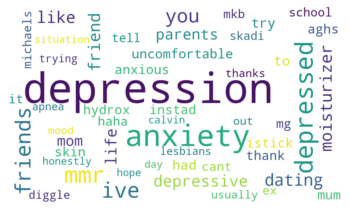

In [72]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
wc.to_file("D:/chi2_words_depresion.png")

## Clasificación con CHI2 considerando palabras de paro

In [74]:
from word_level_da.classifier.svm_text import Svm_Text

In [75]:
doc_test=\
data_cls.get_dataset(folder_name="prep_chunks", truth_name="golden_truth.txt", partition="test")

In [76]:
len(doc_test[0])

298670

In [77]:
svm= Svm_Text(all_training[0], all_training[1], True)

In [78]:
svm.extract_features(doc_test[0], feature="word", method="tf-idf", nrange1=(1,1) , nrange2=None, 
     k=len(top_words_with_stop), stop_words=None, norm="l2", idf=True, feature_selection=True, reduce_method="Xi")


# Features:  (258585, 1080)
Training:  (258585, 1080)
Testing:  (298670, 1080)


In [79]:
len(doc_test[3])

2

In [80]:
score= svm.train_and_test(doc_test[1], doc_test[3])

In [81]:
score

[1080,
 0.7829268292682927,
 0.2857142857142857,
 0.8354430379746836,
 0.42580645161290326]

scoreDistribución en la clase positiva

In [82]:
positive_docs=[]
positive_labels=[]

In [83]:
for doc, label  in zip(all_training[0],all_training[1]):
    if label==1:
        positive_docs.append(doc)
        positive_labels.append(label)
        

In [84]:
len(positive_docs)

31396

In [85]:
exp_cls_p=explore_data(positive_docs, positive_labels, "D:/", plot_format="png")

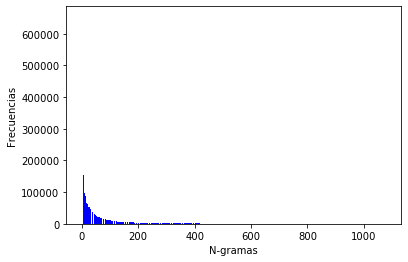

In [86]:
exp_cls.plot_frequency_distribution_of_word_list(
    ngram_range=(1,1), show_labels=False,
    by_docs=False, word_list=top_words_with_stop.index)

### Frecuencia clase positiva

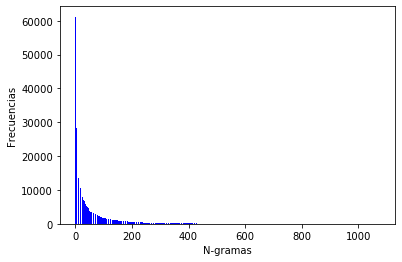

In [87]:
exp_cls_p.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=False, word_list=top_words_with_stop.index)

### Frecuencia por documentos

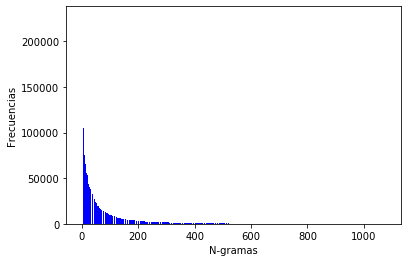

In [88]:
exp_cls.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)

### Clase positiva

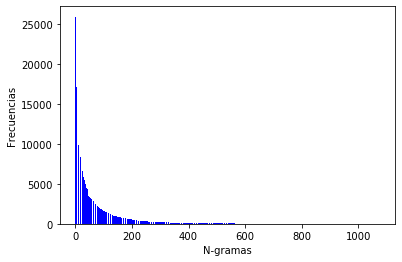

In [89]:
exp_cls_p.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)

In [90]:
negative_docs=[]
negative_labels=[]

In [91]:
for doc, label in zip(all_training[0], all_training[1]):
    if label==0:
        negative_docs.append(doc)
        negative_labels.append(label)
        

In [92]:
len(negative_docs)

227189

In [93]:
exp_cls_n=explore_data(negative_docs, negative_labels, "D:/", plot_format="png")

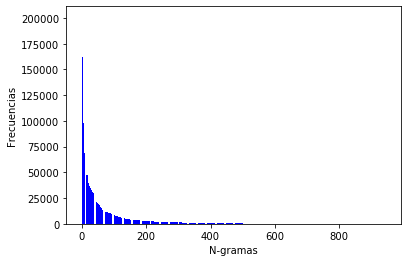

In [94]:
exp_cls_n.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)